In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import normal

In [2]:
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])
    for i in range(num):
        x = float(i)/float(num-1)
        y = np.sin(2*np.pi*x) + normal(scale=0.3)
        dataset = dataset.append(Series([x,y], index=['x','y']),
                                 ignore_index=True)
    return dataset

In [3]:
train_set = create_dataset(10)

In [4]:
train_set

,x,y
0,0.000000,-0.438291
1,0.111111,0.337544
2,0.222222,1.564683
3,0.333333,0.961384
4,0.444444,0.326543
5,0.555556,-0.651139
6,0.666667,-0.162996
7,0.777778,-0.625423
8,0.888889,-0.501776
9,1.000000,-0.196964


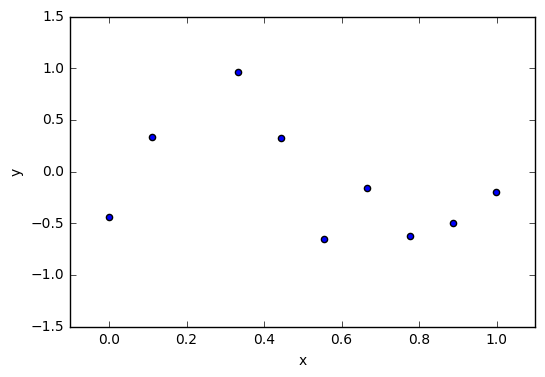

In [5]:
train_set.plot(kind='scatter', x='x', y='y',
             xlim=[-0.1,1.1], ylim=[-1.5,1.5])

In [6]:
def create_dataset(num):
    data_x = np.linspace(0,1,num)
    data_y = np.sin(2*np.pi*data_x) + normal(loc=0,scale=0.3,size=num)
    dataset = DataFrame({'x': data_x, 'y': data_y})
    return dataset

In [7]:
def resolve(dataset, m):
    t = dataset.y
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return f

In [8]:
def resolve_debug(dataset, m):
    t = dataset.y
    
    print "\nt:"
    print t
    
    phi = DataFrame()
    for i in range(0,m+1):
        p = dataset.x**i
        p.name="x**%d" % i
        phi = pd.concat([phi,p], axis=1)

    print "\nphi:"
    print phi
    
    tmp = np.linalg.inv(np.dot(phi.T, phi))
    ws = np.dot(np.dot(tmp, phi.T), t)

    print "\nws:"
    print ws
    
    def f(x):
        y = 0
        for i, w in enumerate(ws):
            y += w * (x ** i)
        return y

    return f

In [9]:
f = resolve_debug(train_set, 3)


t:
0   -0.438291
1    0.337544
2    1.564683
3    0.961384
4    0.326543
5   -0.651139
6   -0.162996
7   -0.625423
8   -0.501776
9   -0.196964
Name: y, dtype: float64

phi:
   x**0      x**1      x**2      x**3
0   1.0  0.000000  0.000000  0.000000
1   1.0  0.111111  0.012346  0.001372
2   1.0  0.222222  0.049383  0.010974
3   1.0  0.333333  0.111111  0.037037
4   1.0  0.444444  0.197531  0.087791
5   1.0  0.555556  0.308642  0.171468
6   1.0  0.666667  0.444444  0.296296
7   1.0  0.777778  0.604938  0.470508
8   1.0  0.888889  0.790123  0.702332
9   1.0  1.000000  1.000000  1.000000

ws:
[ -0.4114804   12.55480291 -32.72192053  20.55133346]


In [10]:
def rms_error(dataset, f):
    err = 0.0
    for index, line in dataset.iterrows():
        x, y = line.x, line.y
        err += 0.5 * (y - f(x))**2
    return np.sqrt(2 * err / len(dataset))

In [11]:
def rms_error(dataset, f):
    return np.sqrt(np.sum((dataset.y - f(dataset.x))**2)/len(dataset))

In [12]:
def show_result(subplot, train_set, m):
    f = resolve(train_set, m)
    subplot.set_xlim(-0.05,1.05)
    subplot.set_ylim(-1.5,1.5)
    subplot.set_title("M=%d" % m)

    # トレーニングセットを表示
    subplot.scatter(train_set.x, train_set.y, marker='o',
                    color='blue', label=None)

    # 真の曲線を表示
    linex = np.linspace(0,1,101)
    liney = np.sin(2*np.pi*linex)
    subplot.plot(linex, liney, color='green', linestyle='--')

    # 多項式近似の曲線を表示
    linex = np.linspace(0,1,101)
    liney = f(linex)
    label = "E(RMS)=%.2f" % rms_error(train_set, f)
    subplot.plot(linex, liney, color='red', label=label)
    subplot.legend(loc=1)    

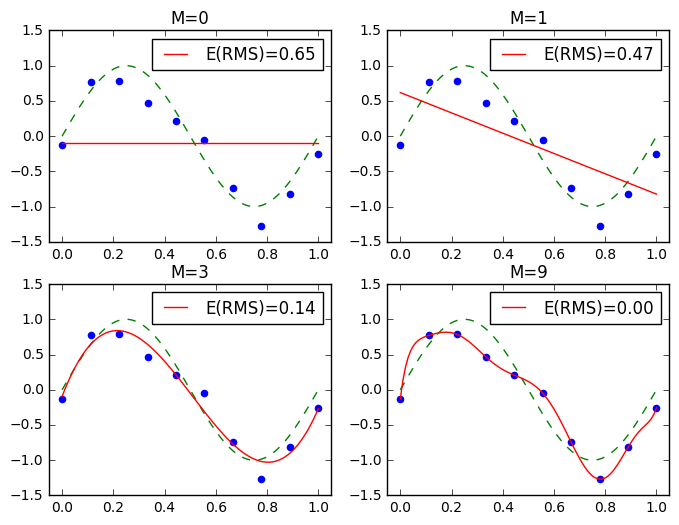

In [17]:
fig = plt.figure(figsize=(8, 6))
for i, m in enumerate([0,1,3,9]):
    subplot = fig.add_subplot(2,2,i+1)
    show_result(subplot, train_set, m)

In [14]:
def show_rms_trend(train_set, test_set):
    df = DataFrame(columns=['Training set','Test set'])
    for m in range(0,10):   # 多項式の次数
        f = resolve(train_set, m)
        train_error = rms_error(train_set, f)
        test_error = rms_error(test_set, f)
        df = df.append(Series([train_error, test_error],
                              index=['Training set','Test set']),
                       ignore_index=True)
    df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))

In [15]:
def show_rms_trend_debug(train_set, test_set):
    df = DataFrame(columns=['Training set','Test set'])
    for m in range(0,10):   # 多項式の次数
        f = resolve(train_set, m)
        train_error = rms_error(train_set, f)
        test_error = rms_error(test_set, f)
        df = df.append(Series([train_error, test_error],
                              index=['Training set','Test set']),
                       ignore_index=True)
    
    print df
    
    df.plot(title='RMS Error', style=['-','--'], grid=True, ylim=(0,0.9))

   Training set  Test set
0      0.654370  0.743018
1      0.465365  0.573458
2      0.462929  0.576735
3      0.138445  0.281417
4      0.136046  0.290995
5      0.126021  0.280504
6      0.071521  0.293895
7      0.013880  0.310773
8      0.013857  0.311028
9      0.000186  0.314195


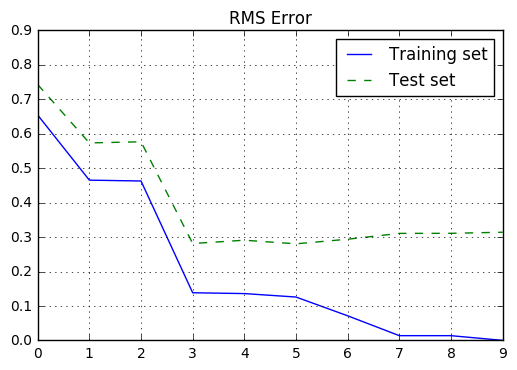

In [16]:
train_set = create_dataset(10)
test_set = create_dataset(10)
show_rms_trend_debug(train_set, test_set)